In [96]:
import random 
import matplotlib.pyplot as plt
import numpy as np 

#inizialmente pensavo di inserire i parametri da un file o da tastiera, tuttavia ho pensato che considerando che i parametri sono soltanto quattro e che il Python è precompilato sarebbe stato più veloce cambiarli direttamente nel codice qui sotto.
t = 10000 #int(input()) #tempo totale della simulazione
n = 100 #int(input()) #numero di intervalli per ogni step
x0 = 0 #float(input()) #valore iniziale
k = 0.1 #float(input()) #valore di k

dt = 1/n #lasso di tempo per ogni intervallo
N = t*n #numero totali di punti

In [97]:
Z = np.zeros(N) #creo un array vuoto pieno di zeri

for i in range(0,N):
    Z[i] = random.gauss(0,2*dt) #popolo Z di numeri generati gaussianamente, la media è 0 e la varianza 2*dt

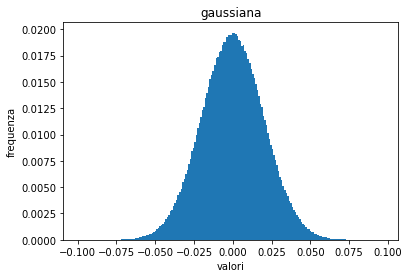

In [98]:
#visualizziamo Z per vedere se è effettivamente la gaussiana voluta
wts1 = np.ones_like(Z) / len(Z) #np.ones_like(Z) crea un array lungo quanto Z ma popolato solo da 1s

plt.title("gaussiana")
plt.xlabel("valori")
plt.ylabel("frequenza")
plt.hist(Z,200,weights=wts1) #weights=wts1 rende l'istogramma normalizzato
plt.show() #in una IDE non serve a niente, da terminale meglio metterlo perchè a volte non mostra i grafici nonostante li computi

In [99]:
x = np.zeros(N) #creo un array vuoto piena di zeri
x[0] = x0 #ci aggiungo l'elemento x0

#adesso applichiamo eulero, il coefficiente di drift k è positivo o negativo in base al segno di x[i]
for i in range(0, N-1):
    if x[i] > 0 :
        x[i+1] = x[i] + (-k) * dt + Z[i] #h=k, g=1
    else:
        x[i+1] = x[i] + (+k) * dt + Z[i] #h=-k, g=1

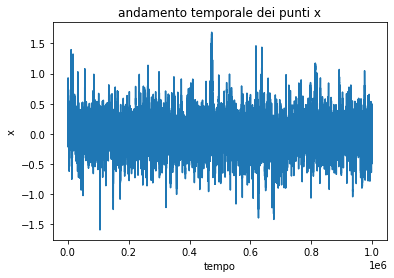

In [100]:
#visualizziamo l'andamento dei punti
plt.title("andamento temporale dei punti x")
plt.xlabel("tempo")
plt.ylabel("x")
plt.plot(x) 
plt.show()

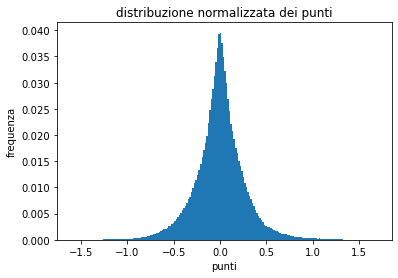

In [101]:
#visualizziamo la distribuzione dei punti, normalizzata
wts2 = np.ones_like(x) / len(x) #np.ones_like(x) crea un array lungo quanto x ma popolato solo da 1s

plt.title("distribuzione normalizzata dei punti")
plt.xlabel("punti")
plt.ylabel("frequenza")
plt.hist(x,200, weights=wts2) #weights è il fattore moltiplicativo dato ad ogni valore
plt.show()

In [102]:
print("la media è:", np.mean(x))
print("la varianza è:", np.var(x))

la media è: -0.0023016017678946393
la varianza è: 0.07325140119578938


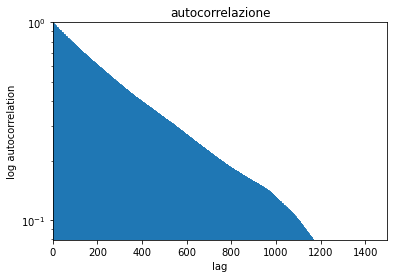

In [103]:
#qui facciamo l'autocorrelazione e vediamo che viene
plt.acorr(x,maxlags=10000) #il maxlags è 100*100 perché in realtà fra x0 e x1 ci sono 100 punti di distanza nel nostro array, questo sarebbe il lag a 100
plt.yscale('log') #questo setta l'asse y logaritmico
plt.xlim(left=0,right=1500) #questo limita l'asse x
plt.ylim(top=1) #questo limite superiormente l'asse y
plt.title("autocorrelazione")
plt.xlabel("lag")
plt.ylabel("log autocorrelation")
plt.show()